In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# Sequential: We’ll use the Sequential model to build a neural network with a linear stack of layers. Data flows sequentially
# from one layer to the next in this model, as in the neural network structure that we saw in the previous section.

# Dense: The Dense module allows us to add layers within a neural network.

In [3]:
# Within our Sequential model, we'll add three Dense layers that will act as our input, hidden, and output layers. 
# For each Dense layer, we'll define the number of neurons, as well as the activation function.

# Once we have completed our Sequential model design, we can apply the same model-fit-predict workflow that we have previously 
# used for other machine learning algorithms. We originally learned this pattern in scikit-learn. But most machine learning 
# frameworks, including TensorFlow, follow this same pattern.

In [4]:
# Using dummy dataset for this demo. Coding a neural network that can solve binary classification.

In [8]:
# Create dummy data with 1000 samples/data points. Two features split into x(features) and y(target)
from sklearn.datasets import make_blobs
x,y=make_blobs(n_samples=1000,centers=2,n_features=2,random_state=1)

In [9]:
# preprocess by transforming y into a vertical vector (single column)
y=y.reshape(-1,1)

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

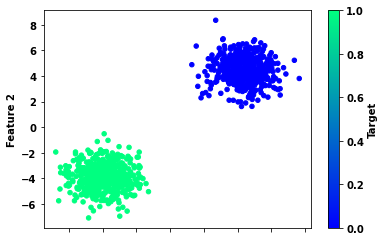

In [10]:
#visualize using pandas plot function
import pandas as pd

df=pd.DataFrame(x, columns=['Feature 1','Feature 2'])
df['Target']=y

df.plot.scatter(x='Feature 1', y='Feature 2', c='Target',colormap='winter')

In [11]:
#split data into training and testing datasets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1)

In [12]:
# Before using a neural network, we must normalize, or standardize, our data. Neural networks typically perform better with
# all input features on the same scale. This makes it easier for the neural network to adjust the weights in the network.

# Developers commonly use scikit-learn's MinMaxScaler or StandardScaler functions to scale and normalize input features. 
# For this example, we will use StandardScaler to scale the features data. We do not need to scale the target data (y), because 
# it is already encoded as 0 and 1.

In [17]:
#create scaler instance
from sklearn.preprocessing import StandardScaler
x_scaler=StandardScaler()

# fit the scaler
x_scaler.fit(x_train)

#scale the data
x_train_scaled=x_scaler.transform(x_train)
x_test_scaled=x_scaler.transform(x_test)

In [18]:
# To create a neural network, we first define an instance of the model.
# In this case, we will create an instance of the Sequential model and set it equal to the neuron variable. The neuron variable
# will store the architecture of our model, as the following code shows:

neuron = Sequential()

In [19]:
# In this demonstration, we will create a neural network model with an input layer that consists of two inputs—one for each 
# feature on our DataFrame. We will also add one hidden layer with three neurons. The hidden layer will perform data 
# transformations on the inputs that we enter into the network.
# When we begin coding the model’s architecture, our initial step will create both an input layer containing two inputs and a
# hidden layer containing three neurons. To add these initial layers to our neural network, we use the add function and the 
# Dense module, as the following code shows:

number_inputs=2
number_hidden_nodes=3

neuron.add(Dense(units=number_hidden_nodes,activation='relu',input_dim=number_inputs))

In [20]:
# Our initial code creates the input layer and the first hidden layer so the number of inputs is the input_dim param
# Also defined is the number of neurons in the first hidden layer with the units param
# In this case we are defining our activation param as the recified linear unit (ReLU) function. 
# ReLU is currently the world's most used activation function for training deep neural networks.

In [21]:
# Now we just need our output layer. USing Dense we will create a new layer in the Sequential model

number_classes=1
neuron.add(Dense(units=number_classes,activation='sigmoid'))

In [22]:
# Only needed to supply units and activation params
# units is the number of output neurons. Because this is a classification model the model will output yes/no (1/0) binary 
# decision for each input data point so only need one output neuron to do this

# Activation: previously ReLU was used due to the nonlinear relationships. Now for the classification model's output layer 
# the sigmoid is used. Sigmoid outputs in a range between 0 and 1. This allows the model to map the result to a probability
# that the input point belongs to Class 1 (rather than Class 0). Alternatively it would allow hard classification and identify
# each input data point as either Class 1 or Class 0. For this type of classification, the model would use a default 
# threshold of .5 e.g. the model would classify any data point with ouput >0.5 as Class 1 and <0.5 as Class 0

In [23]:
# Display the model summary
neuron.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 9         
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________
